In [1]:
import matplotlib.pyplot as plt
import numpy as np

file = open("unbiased/su1")
distances = []
for line in file:
    split = line.split()
    time = int(float(split[0]))
    distance = float(split[1])
    while (len(distances) <= time):
        distances.append(np.inf)
    distances[time] = distance
file.close()

file = open("unbiased/su2")
for line in file:
    split = line.split()
    time = int(float(split[0]))
    distance = float(split[1])
    while (len(distances) <= time):
        distances.append(np.inf)
    distances[time] = distance
file.close()

file = open("unbiased/su3")
for line in file:
    split = line.split()
    time = int(float(split[0]))
    distance = float(split[1])
    while (len(distances) <= time):
        distances.append(np.inf)
    distances[time] = distance
file.close()

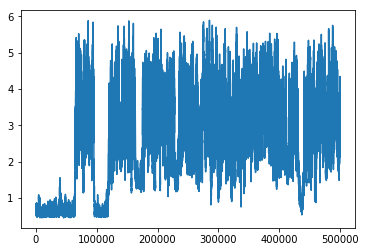

In [2]:
plt.plot(distances)
plt.show()

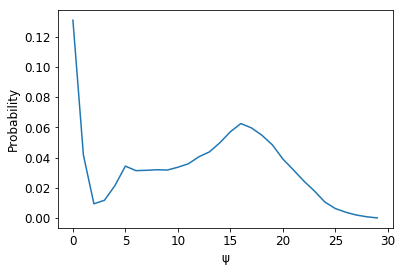

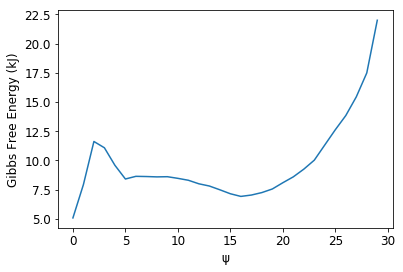

[ 5.07422291  7.9274652  11.61678306 11.0776254   9.57931184  8.40557774
  8.63373016  8.61630586  8.5864931   8.60198264  8.46117132  8.29741967
  7.99507863  7.80467239  7.4817569   7.14287536  6.91539578  7.03155523
  7.242505    7.55060741  8.08554072  8.59070799  9.24855221 10.01877768
 11.32166565 12.62048386 13.83733995 15.43646001 17.48658189 21.99460457]


In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
mini = np.min(distances)
maxi = np.max(distances)
bins = 30
bin_size = (maxi - mini) / bins
binning = [0.0 for i in range(bins)]
counter = 0
for i in distances:
    counter = counter + 1
    b = (int) ((i - mini) / bin_size)
    if b == bins:
        b = b - 1
    binning[b] = binning[b] + 1.0
binning = np.array(binning)
binning = binning / counter
plt.plot(binning)
plt.xlabel("\u03C8")
plt.ylabel("Probability")
plt.show()
file = open("data.txt", "w+")
val = mini
for i in binning:
    p = i
    g = -8.314 * 3 / 10 * np.log(p)
    string = str(val) + "\t" + str(p) + "\t" + str(g) + "\n"
    file.write(string)
    val = val + bin_size
file.close()
binning = np.log(binning)
binning = -8.314 * 3 / 10 * binning
plt.plot(binning)
plt.xlabel("\u03C8")
plt.ylabel("Gibbs Free Energy (kJ)")
plt.show()
print(binning)

In [4]:
unbound = 0.0
bound = 0.0
for i in distances:
    if i > 1.0:
        unbound += 1.0
    else:
        bound += 1.0
total = unbound + bound
unbound = unbound / total
bound = bound / total
print(unbound)
print(bound)
unbound = -8.314 * 3 / 10 *  np.log(unbound)
bound = -8.314 * 3 / 10 *  np.log(bound)
print(unbound)
print(bound)
print(bound - unbound)

0.818012363975272
0.18198763602472795
0.5010294776234231
4.249659184494325
3.748629706870902


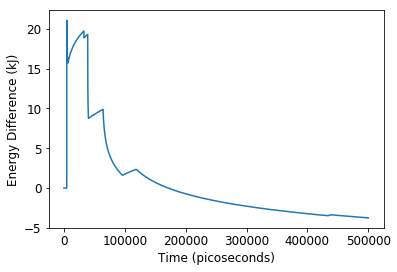

In [5]:
counter = 0.0
unbound = 0.0
bound = 0
free_energy = []
for i in distances:
    counter = counter + 1
    if i > 1.0:
        unbound = unbound + 1.0
    else:
        bound = bound + 1.0
    unbound_prob = unbound / counter
    bound_prob = bound / counter
    if not unbound_prob == 0.0:
        unbound_energy = -8.314 * 3 / 10 *  np.log(unbound_prob)
        bound_energy = -8.314 * 3 / 10 *  np.log(bound_prob)
        diff = unbound_energy - bound_energy
        free_energy.append(diff)
    else:
        free_energy.append(0)
plt.xlabel("Time (picoseconds)")
plt.ylabel("Energy Difference (kJ)")
plt.plot(free_energy)